How does Area, Major Axis Length, Convex Area, and Perimeter Identify the Class of a Given Raisin?

**Intro**

Raisins are a common snack distributed globally which contain high concentrations of carbohydrates, and beneficial nutrients such as iron, potassium, fibre, and antioxidants (Olmo-Cunillera et al., 2019). Raisins also contribute to the economy of many countries, with the United States, Turkey, and Iran producing about 80% of the world’s raisins (Abolghasem Mortazavi et al., 2013). The importance of this dried fruit has inspired research dedicated to improving the production and export of raisin products. Some of this research has revolved around the development of computerized programs that can better evaluate the quality and classes of raisin products than doing so by hand (Cinar et al., 2020).

Cinar et al., (2020) performed an analysis of two common classes of raisins produced using grapes grown in Turkey with the intention of developing a machine vision system that could use multiple predictors to differentiate between Besni and Keciman raisin classes. The study used a morphological interface consisting of seven different features to collect data on the raisin classes. Cinar et al.’s (2020) program uses imaging, which takes measurements of each raisin based on the number of pixels it takes up. Due to the difference in size between Besni and Kecimen raisin classes, Cinar et al. (2020) were able to identify certain measurable raisin properties that exhibited large values of standard deviation.

In this paper, we used data from Cinar et al. (2023) to evaluate the efficacy of four raisin properties identified by Cinar et al. (2020) in predicting whether a raisin was from the `Besni` or `Kecimen` class. These included `Area`, `Major Axis Length`, `Convex Area`, and `Perimeter`. We expected that these properties would be adequate predictors to distinguish between the classes of Besni and Kecimen raisins, due to their large values of standard deviation (Cinar et al., 2020). These large values of standard deviation can be attributed to size differences between the Besni and Kecimen classes. As such, we predicted that the raisins with the largest `Area`, `Convex Area`, and `Major Axis Length` would be of the Besni class. 


**Methods & Results**

For our analysis, we used the K-Nearest algorithm to perform a binary classification. The first step was to load the relevant tidyverse, tidymodels, and repr packages, as well as our raisin data from the web. 


In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)
set.seed(5)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
url <- "https://raw.githubusercontent.com/dvolman/DSCI-Group-Project/main/Raisin_Dataset.csv"
raisin_data <- read_csv(url)
raisin_data

Rows: 900 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Class
dbl (7): Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area  MajorAxisLength MinorAxisLength Eccentricity ConvexArea Extent   
1   87524 442.2460        253.2912        0.8197384    90546      0.7586506
2   75166 406.6907        243.0324        0.8018052    78789      0.6841296
3   90856 442.2670        266.3283        0.7983536    93717      0.6376128
⋮   ⋮     ⋮               ⋮               ⋮            ⋮          ⋮        
898 99657 431.7070        298.8373        0.7216841    106264     0.7410985
899 93523 476.3441        254.1761        0.8457385     97653     0.6587983
900 85609 512.0818        215.2720        0.9073454     89197     0.6320200
    Perimeter Class  
1   1184.040  Kecimen
2   1121.786  Kecimen
3   1208.575  Kecimen
⋮   ⋮         ⋮      
898 1292.828  Besni  
899 1258.548  Besni  
900 1272.862  Besni

Once the data was loaded, it was observed that it met the conditions of having a single observation in each row, a single variable in each column, and a single value in each cell, indicating the data could be considered tidy. Because we are trying to classify raisin species based on various predictors, the next step was to mutate `Class` to be a factor and rename our columns for readability.

In [4]:
raisin_data <- raisin_data |>
                mutate(Class = as_factor(Class))
colnames(raisin_data) <- c("Area", "Major_Axis_Length", "Minor_Axis_Length", "Eccentricity", "Convex_Area", "Extent", "Perimeter", "Class")
raisin_data

Area  Major_Axis_Length Minor_Axis_Length Eccentricity Convex_Area
1   87524 442.2460          253.2912          0.8197384    90546      
2   75166 406.6907          243.0324          0.8018052    78789      
3   90856 442.2670          266.3283          0.7983536    93717      
⋮   ⋮     ⋮                 ⋮                 ⋮            ⋮          
898 99657 431.7070          298.8373          0.7216841    106264     
899 93523 476.3441          254.1761          0.8457385     97653     
900 85609 512.0818          215.2720          0.9073454     89197     
    Extent    Perimeter Class  
1   0.7586506 1184.040  Kecimen
2   0.6841296 1121.786  Kecimen
3   0.6376128 1208.575  Kecimen
⋮   ⋮         ⋮         ⋮      
898 0.7410985 1292.828  Besni  
899 0.6587983 1258.548  Besni  
900 0.6320200 1272.862  Besni

Next, we set seed to be five. The purpose of this step is to ensure that the data analysis is random, yet, still reproducible by using the same random combination each time the code is run. Splitting the data into training sets was the next task. We used 75% of our data for the training set leaving 25% for testing which fit the typical ratio of the training set being between 50 and 95% of the data. Strata is specified to equal `Class` to alleviate concerns of having the wrong ratio of observational categories.

In [5]:
set.seed(5)

raisin_split <- initial_split(raisin_data, prop = 0.75, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)
raisin_train
raisin_test

Area   Major_Axis_Length Minor_Axis_Length Eccentricity Convex_Area
1   137583 649.5415          273.2603          0.9072011    142650     
2   117592 533.2929          288.5583          0.8409660    123587     
3    95546 487.1783          251.9602          0.8558749     99166     
⋮   ⋮      ⋮                 ⋮                 ⋮            ⋮          
672 67874  360.0235          243.2720          0.7371662    69889      
673 50312  354.2356          182.3121          0.8573923    52070      
674 41995  259.2089          210.3508          0.5843375    43443      
    Extent    Perimeter Class  
1   0.7316377 1590.354  Besni  
2   0.7300677 1432.006  Besni  
3   0.7227820 1276.807  Besni  
⋮   ⋮         ⋮         ⋮      
672 0.6783194 1035.277  Kecimen
673 0.6233522  961.439  Kecimen
674 0.7297006  801.526  Kecimen

Area  Major_Axis_Length Minor_Axis_Length Eccentricity Convex_Area
1   87524 442.2460          253.2912          0.8197384    90546      
2   75166 406.6907          243.0324          0.8018052    78789      
3   79408 352.1908          290.8275          0.5640113    81463      
⋮   ⋮     ⋮                 ⋮                 ⋮            ⋮          
224 94282 494.1630          244.8039          0.8686701    97707      
225 68799 356.5678          253.2547          0.7039427    71879      
226 93523 476.3441          254.1761          0.8457385    97653      
    Extent    Perimeter Class  
1   0.7586506 1184.040  Kecimen
2   0.6841296 1121.786  Kecimen
3   0.7927719 1073.251  Kecimen
⋮   ⋮         ⋮         ⋮      
224 0.7023862 1269.680  Besni  
225 0.7009292 1041.270  Besni  
226 0.6587983 1258.548  Besni

**Preliminary Data Analysis**

Before we continue, we add the following preliminary data analyses, for which we will be using the training set `raisin_train`. We summarize the number of observations for each class as a percentage of total observations to ensure the data is balanced. We also confirm there are no missing data to ensure complete and accurate results. 

In [27]:
missing_data <- any(is.na(raisin_train))
total_obs <- nrow(raisin_train) 
summary <- raisin_train |>
            group_by(Class) |>
            summarize(count = n(), percentage = n() / total_obs * 100, missing_data = missing_data)
summary

Class   count percentage missing_data
1 Kecimen 337   50         FALSE       
2 Besni   337   50         FALSE

We also summarize the means of the predictors we will be using in the table below to get a sense of the general value of each predictor. This will enable us to evaluate whether each raisin type is clustered close to the mean, or spread further away.

In [28]:
mean_predictors <- raisin_train |>
                summarize(mean_Area = mean(Area),
                         mean_Major_Axis_Length = mean(Major_Axis_Length),
                         mean_Convex_Area = mean(Convex_Area),
                         mean_Perimeter = mean(Perimeter))
mean_predictors

mean_Area mean_Major_Axis_Length mean_Convex_Area mean_Perimeter
1 87952.76  432.1508               91457.48         1169.421

We also include the following visualizations to show the distribution of each class in each predictor we will be using. This will allow us to determine how raisin type influences each predictor.

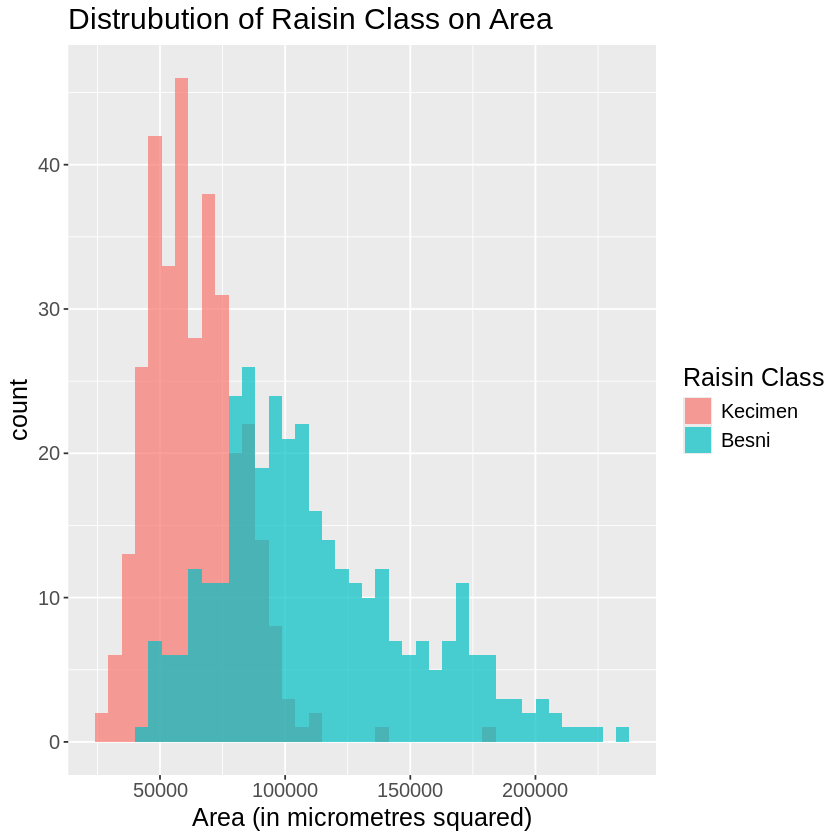

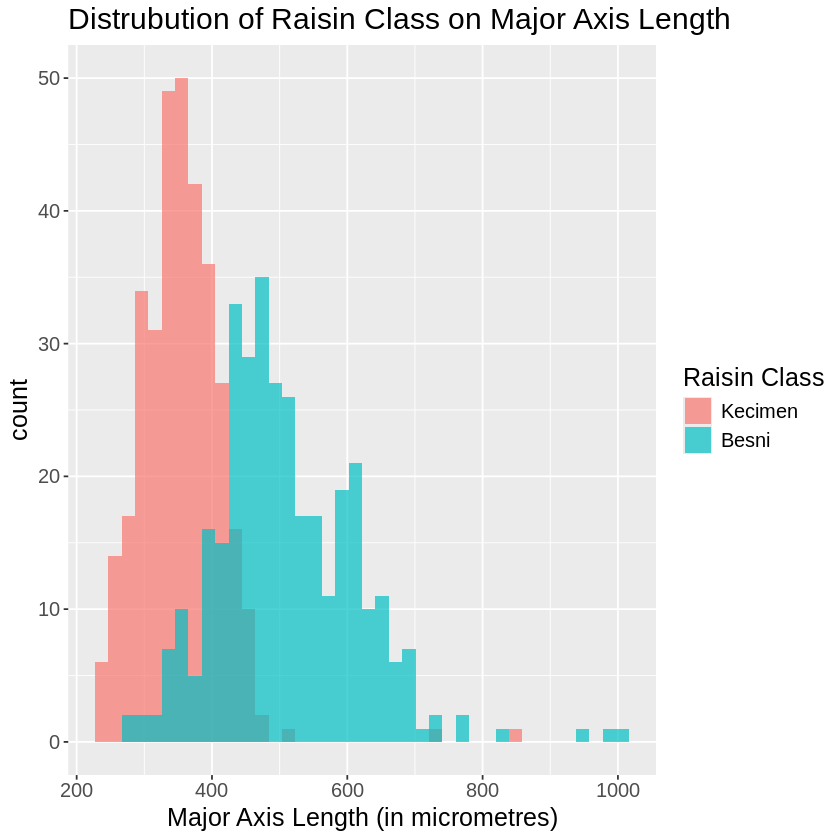

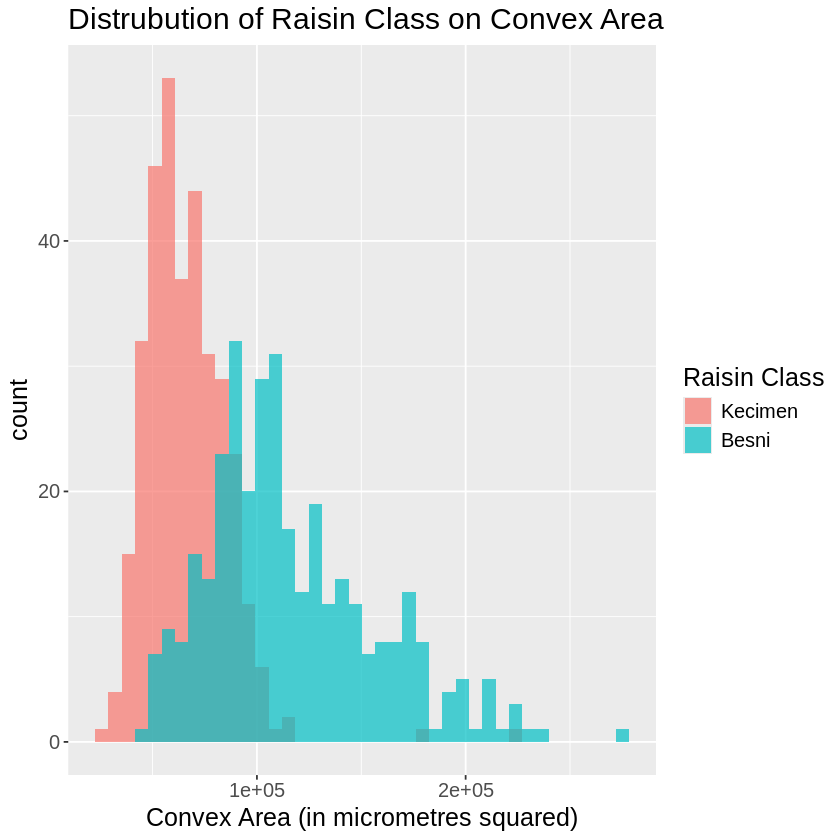

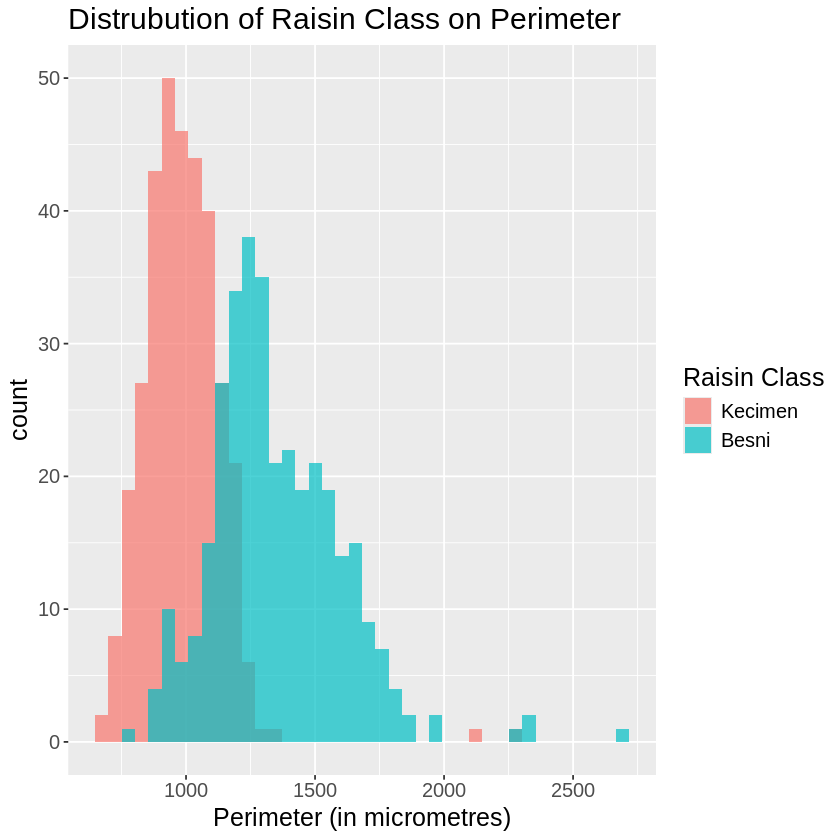

In [26]:
hist_Area <- raisin_train |>
                    ggplot(aes(x = Area, fill = Class)) +
                    geom_histogram(position = "identity", alpha = 0.7, bins = 40) +
                    labs(x = "Area (in micrometres squared)", fill = "Raisin Class", 
                         title = "Distrubution of Raisin Class on Area") +
                    theme(text = element_text(size = 15))
hist_Major_Axis_Length <- raisin_train |>
                    ggplot(aes(x = Major_Axis_Length, fill = Class)) +
                    geom_histogram(position = "identity", alpha = 0.7, bins = 40) +
                    labs(x = "Major Axis Length (in micrometres)", fill = "Raisin Class", 
                         title = "Distrubution of Raisin Class on Major Axis Length") +
                    theme(text = element_text(size = 15))
hist_Convex_Area <- raisin_train |>
                    ggplot(aes(x = Convex_Area, fill = Class)) +
                    geom_histogram(position = "identity", alpha = 0.7, bins = 40) +
                    labs(x = "Convex Area (in micrometres squared)", fill = "Raisin Class", 
                         title = "Distrubution of Raisin Class on Convex Area") +
                    theme(text = element_text(size = 15))
hist_Perimeter <- raisin_train |>
                    ggplot(aes(x = Perimeter, fill = Class)) +
                    geom_histogram(position = "identity", alpha = 0.7, bins = 40) +
                    labs(x = "Perimeter (in micrometres)", fill = "Raisin Class", 
                         title = "Distrubution of Raisin Class on Perimeter") +
                    theme(text = element_text(size = 15))
hist_Area
hist_Major_Axis_Length
hist_Convex_Area
hist_Perimeter

Resuming our analysis, we then put our training data through cross-validation by splitting the training data into V-folds to randomly split data into groups of close to equal size. We selected a v value of ten to balance retrieving data with low standard error while attempting to minimize running time. 

In [6]:
set.seed(5)
raisin_vfold <- vfold_cv(raisin_train, v = 10, strata = Class)

Once our data had been prepared, we could then start data processing by initializing a recipe for the recipe data, specifying that the `Class` variable is the response given `Area`, `Major Axis Length`, `Convex area`, and `Perimeter` are predictors. Scaling and centring was added to the recipe so the predictors would have a mean of zero and standard deviation of one. 

In [7]:
raisin_recipe <- recipe(Class ~ Area + Major_Axis_Length + Convex_Area + Perimeter, data = raisin_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

The K-nearest neighbor classifier was then created and was tuned with the mode set up for classification analysis. The raisin data could then be fit into a workflow by adding both the recipe and the model. To ensure we were selecting the best K value for our model, we evaluated the performance of various values. We created a neighbors dataframe to test for k values by five between one and one hundred which is reasonable considering our data sample size. 

In [8]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                            neighbors = tune()) |>
                            set_engine("kknn") |>
                            set_mode("classification")

In [9]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_workflow <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = raisin_vfold, grid = k_vals) |>
  collect_metrics()

accuracy <- knn_workflow |>
  filter(.metric == "accuracy")

accuracy

neighbors .metric  .estimator mean      n  std_err    .config              
1   1        accuracy binary     0.7936720 10 0.01211506 Preprocessor1_Model01
2   6        accuracy binary     0.8620766 10 0.01271269 Preprocessor1_Model02
3  11        accuracy binary     0.8650624 10 0.01053174 Preprocessor1_Model03
⋮  ⋮         ⋮        ⋮          ⋮         ⋮  ⋮          ⋮                    
18 86        accuracy binary     0.8590909 10 0.01008544 Preprocessor1_Model18
19 91        accuracy binary     0.8606506 10 0.01065033 Preprocessor1_Model19
20 96        accuracy binary     0.8591355 10 0.01023780 Preprocessor1_Model20

The visualization of the results in addition to programmatically pulling the k value with the highest accuracy, suggested that the best K value for this data set was twenty one. K-nearest neighbors classification could then be rerun using the best K. The data was then fit back into a workflow and used during prediction. The prediction of raisin species based on our determined predictors could then be run with accuracy, using both our previously fit workflow, in addition to the raisin testing set, giving us an estimated accuracy of 83.6%. 

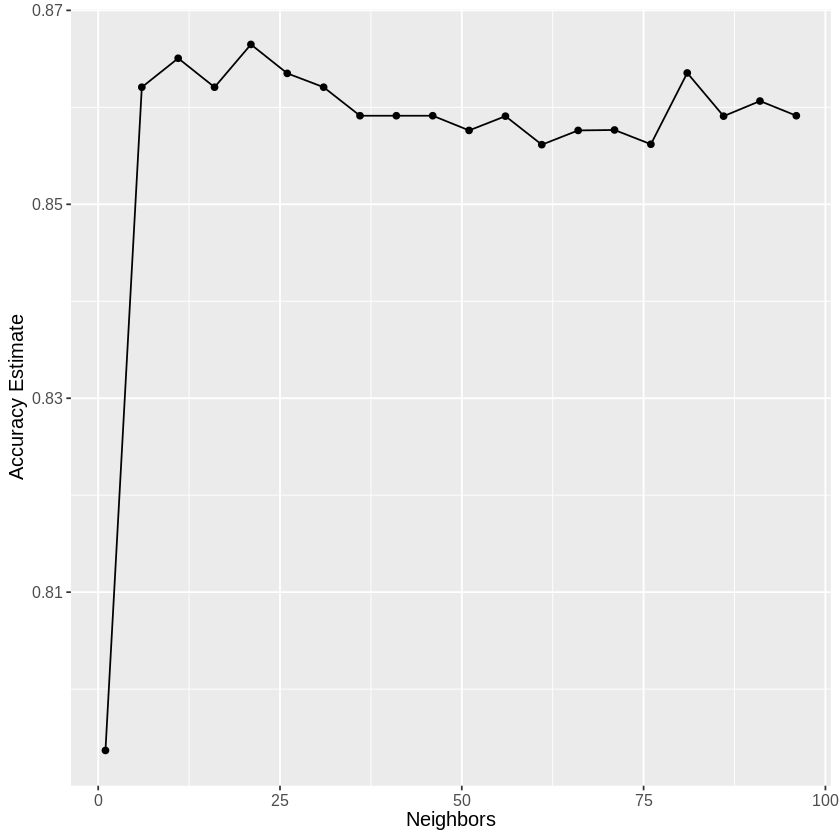

In [10]:
accuracy_vs_k <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [11]:
best_k <- accuracy |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 21

In [12]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  fit(data = raisin_train)

knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1350148
Best kernel: rectangular
Best k: 21

In [13]:
raisin_predictions <- predict(knn_fit, raisin_test) |>
  bind_cols(raisin_test)
raisin_predictions
raisin_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.pred_class Area  Major_Axis_Length Minor_Axis_Length Eccentricity
1   Besni       87524 442.2460          253.2912          0.8197384   
2   Kecimen     75166 406.6907          243.0324          0.8018052   
3   Kecimen     79408 352.1908          290.8275          0.5640113   
⋮   ⋮           ⋮     ⋮                 ⋮                 ⋮           
224 Besni       94282 494.1630          244.8039          0.8686701   
225 Kecimen     68799 356.5678          253.2547          0.7039427   
226 Besni       93523 476.3441          254.1761          0.8457385   
    Convex_Area Extent    Perimeter Class  
1   90546       0.7586506 1184.040  Kecimen
2   78789       0.6841296 1121.786  Kecimen
3   81463       0.7927719 1073.251  Kecimen
⋮   ⋮           ⋮         ⋮         ⋮      
224 97707       0.7023862 1269.680  Besni  
225 71879       0.7009292 1041.270  Besni  
226 97653       0.6587983 1258.548  Besni

.metric  .estimator .estimate
1 accuracy binary     0.8362832

To evaluate the performance of our data analysis, we ran predictions evaluating both precision and recall. We additionally performed a confusion matrix which evaluated the ratio of raisin species predicted. To visualize how our different predictors were influencing the classification of Raisin species, scatter plots were produced. Each scatter plot evaluated the relationship between two different predictors so each combination was considered. The classification of raisin types were color-coded so that Kecimen raisins are orange and Besni raisins are blue. 

In [73]:
raisin_predictions |>
    precision(truth = Class, estimate = .pred_class, event_level="first")

.metric   .estimator .estimate
1 precision binary     0.7835821

Estimated recall.

In [74]:
raisin_predictions |>
    recall(truth = Class, estimate = .pred_class, event_level="first")

.metric .estimator .estimate
1 recall  binary     0.9292035

Confusion matrix.

In [75]:
confusion_matrix <- raisin_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
confusion_matrix

          Truth
Prediction Kecimen Besni
   Kecimen     105    29
   Besni         8    84

Visualization.

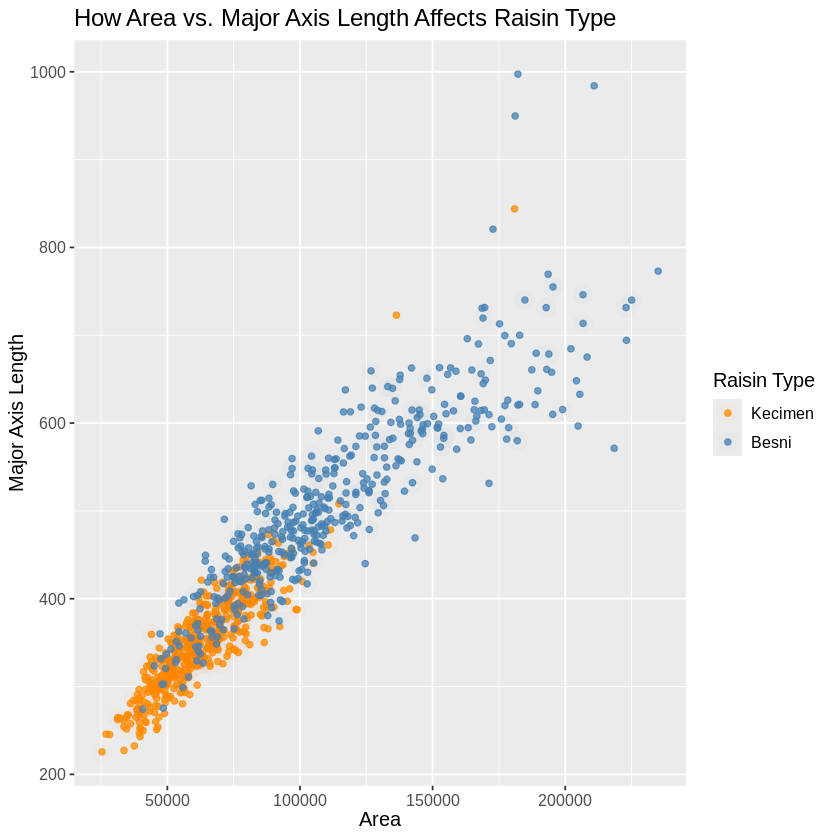

In [14]:
area_and_major_axis_length_plot <- ggplot() +
  geom_point(data = raisin_data,
             mapping = aes(x = Area,
                           y = Major_Axis_Length,
                           color = Class),
             alpha = 0.75) +
  geom_point(data = raisin_predictions,
             mapping = aes(x = Area,
                           y = Major_Axis_Length,
                           color = Class),
             alpha = 0.02,
             size = 5) +
  labs(color = "Raisin Type",
       x = "Area",
       y = "Major Axis Length") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12)) +
    ggtitle("How Area vs. Major Axis Length Affects Raisin Type")

area_and_major_axis_length_plot

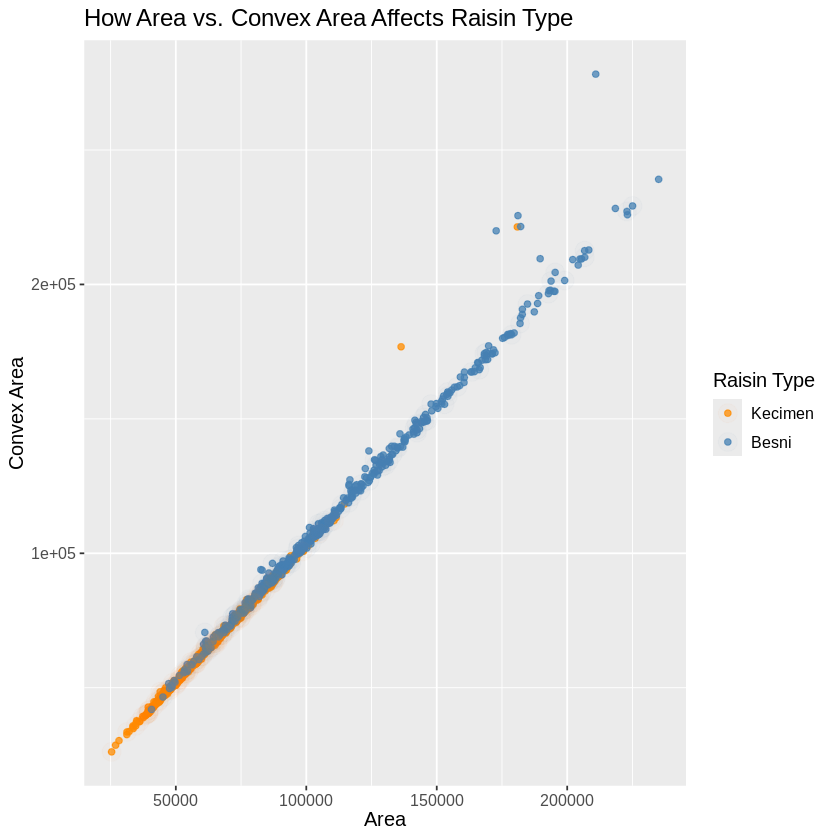

In [15]:
area_and_convex_area_plot <- ggplot() +
  geom_point(data = raisin_data,
             mapping = aes(x = Area,
                           y = Convex_Area,
                           color = Class),
             alpha = 0.75) +
  geom_point(data = raisin_predictions,
             mapping = aes(x = Area,
                           y = Convex_Area,
                           color = Class),
             alpha = 0.02,
             size = 5) +
  labs(color = "Raisin Type",
       x = "Area",
       y = "Convex Area") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12)) +
    ggtitle("How Area vs. Convex Area Affects Raisin Type")

area_and_convex_area_plot 

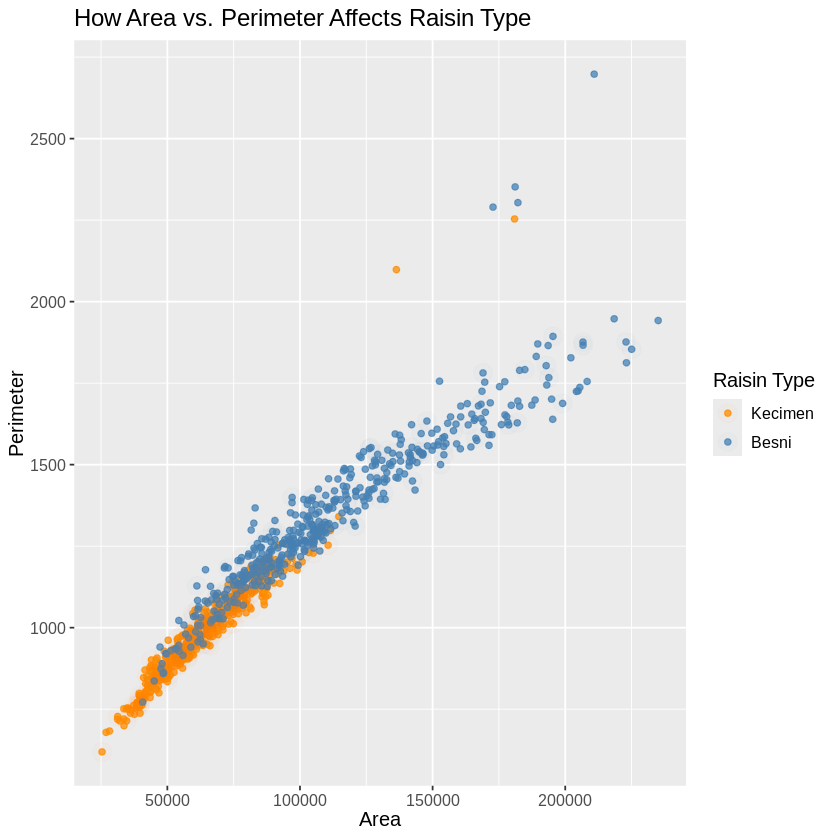

In [17]:
area_and_perimeter_plot <- ggplot() +
  geom_point(data = raisin_data,
             mapping = aes(x = Area,
                           y = Perimeter,
                           color = Class),
             alpha = 0.75) +
  geom_point(data = raisin_predictions,
             mapping = aes(x = Area,
                           y = Perimeter,
                           color = Class),
             alpha = 0.02,
             size = 5) +
  labs(color = "Raisin Type",
       x = "Area",
       y = "Perimeter") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12)) +
    ggtitle("How Area vs. Perimeter Affects Raisin Type")

area_and_perimeter_plot 

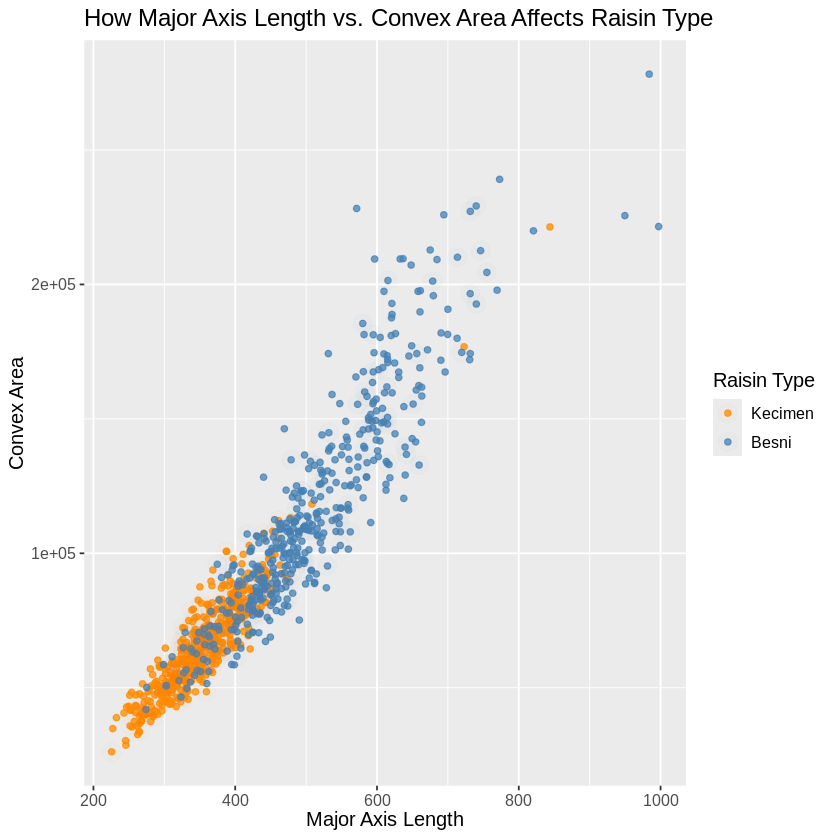

In [19]:
major_axis_length_and_convex_area_plot <- ggplot() +
  geom_point(data = raisin_data,
             mapping = aes(x = Major_Axis_Length,
                           y = Convex_Area,
                           color = Class),
             alpha = 0.75) +
  geom_point(data = raisin_predictions,
             mapping = aes(x = Major_Axis_Length,
                           y = Convex_Area,
                           color = Class),
             alpha = 0.02,
             size = 5) +
  labs(color = "Raisin Type",
       x = "Major Axis Length",
       y = "Convex Area") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12)) +
    ggtitle("How Major Axis Length vs. Convex Area Affects Raisin Type")

major_axis_length_and_convex_area_plot

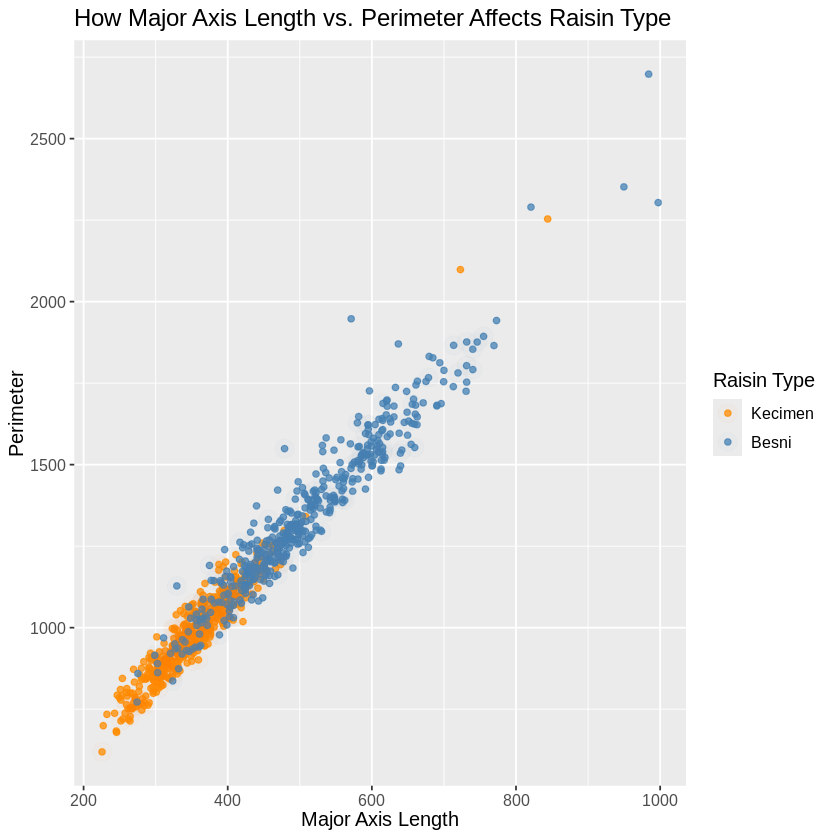

In [22]:
major_axis_length_and_perimeter_plot <- ggplot() +
  geom_point(data = raisin_data,
             mapping = aes(x = Major_Axis_Length,
                           y = Perimeter,
                           color = Class),
             alpha = 0.75) +
  geom_point(data = raisin_predictions,
             mapping = aes(x = Major_Axis_Length,
                           y = Perimeter,
                           color = Class),
             alpha = 0.02,
             size = 5) +
  labs(color = "Raisin Type",
       x = "Major Axis Length",
       y = "Perimeter") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12)) +
    ggtitle("How Major Axis Length vs. Perimeter Affects Raisin Type")

major_axis_length_and_perimeter_plot 

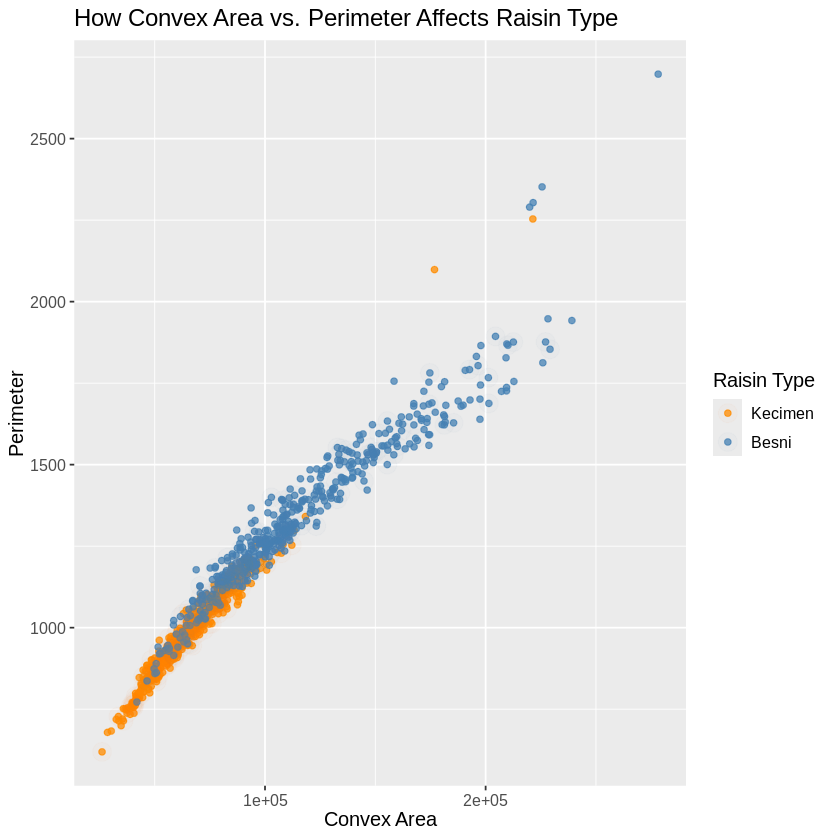

In [21]:
convex_area_and_perimeter_plot <- ggplot() +
  geom_point(data = raisin_data,
             mapping = aes(x = Convex_Area,
                           y = Perimeter,
                           color = Class),
             alpha = 0.75) +
  geom_point(data = raisin_predictions,
             mapping = aes(x = Convex_Area,
                           y = Perimeter,
                           color = Class),
             alpha = 0.02,
             size = 5) +
  labs(color = "Raisin Type",
       x = "Convex Area",
       y = "Perimeter") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12)) +
    ggtitle("How Convex Area vs. Perimeter Affects Raisin Type")

convex_area_and_perimeter_plot 

**Discussion**

We expected that raisin properties such as area, major axis length, convex area, and perimeter would serve as adequate predictors for classification between Besni and Kecimen raisin classes. As we predicted, raisins with the largest area, major axis length, convex area, and perimeters were most often of the Besni class. We also observe that each pair of predictors have a strong positive, linear relationship with one another, with Area and Convex Area having the strongest connection. We found that these chosen predictors had relatively high accuracy, precision, and recall values (83.6%, 78.3%, and 92.9% respectively). 

While we were not able to find existing data on the accuracy, precision, and recall of hand-classified raisins for comparison, we believe that our chosen properties served as adequate predictors in the classification of raisins using K-Nearest algorithms. Other studies in the past have classified raisins using more complex machine learning models, and have reached raisin classification accuracies of over 98% using similar predictors (Raihen et al., 2023). While our accuracy was not as high, the ease and minimal time constraints of using the K-Nearest algorithm may attract raisin producers who want relatively accurate raisin classification within a timely manner. 

Depending on the needs of raisin producers, our classification method may be more than adequate to enhance the production and export of raisin products. Compared to classifying raisins by hand, our automated system could reduce the time and financial requirements of raisin quality evaluation. However, these results also introduce further questions, including about how they can be utilized on a large-scale, production capacity. While these results are significant, they cannot be effectively implemented without a way to quickly measure the properties of each raisin that must be classified. This requires further development of imaging techniques that are suitable for such a large task. Regardless, these results enable additional research in the area of automated raisin measurement and imaging, which could broaden knowledge of both raisins and the techniques used to evaluate them. 


**References**

Abolghasem Mortazavi, S., Ahmadi Kaliji, S., Aminravan, M.,  Radmehr, R., (2013). Iran's Raisins Export Comparative Advantage and Top Five Raisins Exporter Countries. International Journal of Agriculture and Crop Sciences, 5, 1606-1611. 

Çinar, I., Koklu, M., & Tasdemir, S., (2023). Raisin. UCI Machine Learning Repository. https://doi.org/10.24432/C5660T

Cinar, I., Koklu, M., & Tasdemir, S. (2020). Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması. Gazi Journal of Engineering Sciences, 6(3), 200-209.

Olmo-Cunillera, A., Escobar-Avello, D., Pérez, A. J., Marhuenda-Muñoz, M., Lamuela-Raventós, R. M., Vallverdú-Queralt, A. (2019). Is eating raisins healthy? Nutrients, 12(1), 54. https://doi.org/10.3390/nu12010054

Raihen, M., & Akter, S., (2024). Prediction modeling using deep learning for the classification of grape-type dried fruits. International Journal of Mathematics and Computer in Engineering, 2(1), 1-12. https://doi.org/10.2478/ijmce-2024-0001
